# Домашнее задание 3.1. Визуализация данных в Python
# 🏃‍♂️🤸‍♂️🏋️‍♀️ 


<span style="color:blue"> Привет, это Людмила Антонова, кандидат в наставники курса "Аналитика данных в Питоне". Спасибо за интересные задания.
Комментарии к графикам и ответы на вопросы пишу синим цветом. </span>

Поздравляем, ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на 2021 год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

Не стесняйся оставлять свои комментарии и заметки с рекомендациями для руководителя относительно данных, которые видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

#сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [4]:
workouts.head()

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530


## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь.**

Как это сделать:

1. Работать будем с датафремом `workouts`.
2. Сгруппируй данные по дням, найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [129]:
# добавим колонку с датой тренировки
workouts['date'] = workouts['start_at'].dt.date # добавим номер дня недели

# посчитаем количество тренировок в день
trainings_by_day =  workouts[['date', 'workout_id']].groupby('date').count()

# изменим формат индекса на временной
trainings_by_day.index = pd.to_datetime(trainings_by_day.index, format = '%Y-%m-%d')

# заменим индекс столбцом с данными
trainings_by_day.reset_index(inplace = True)

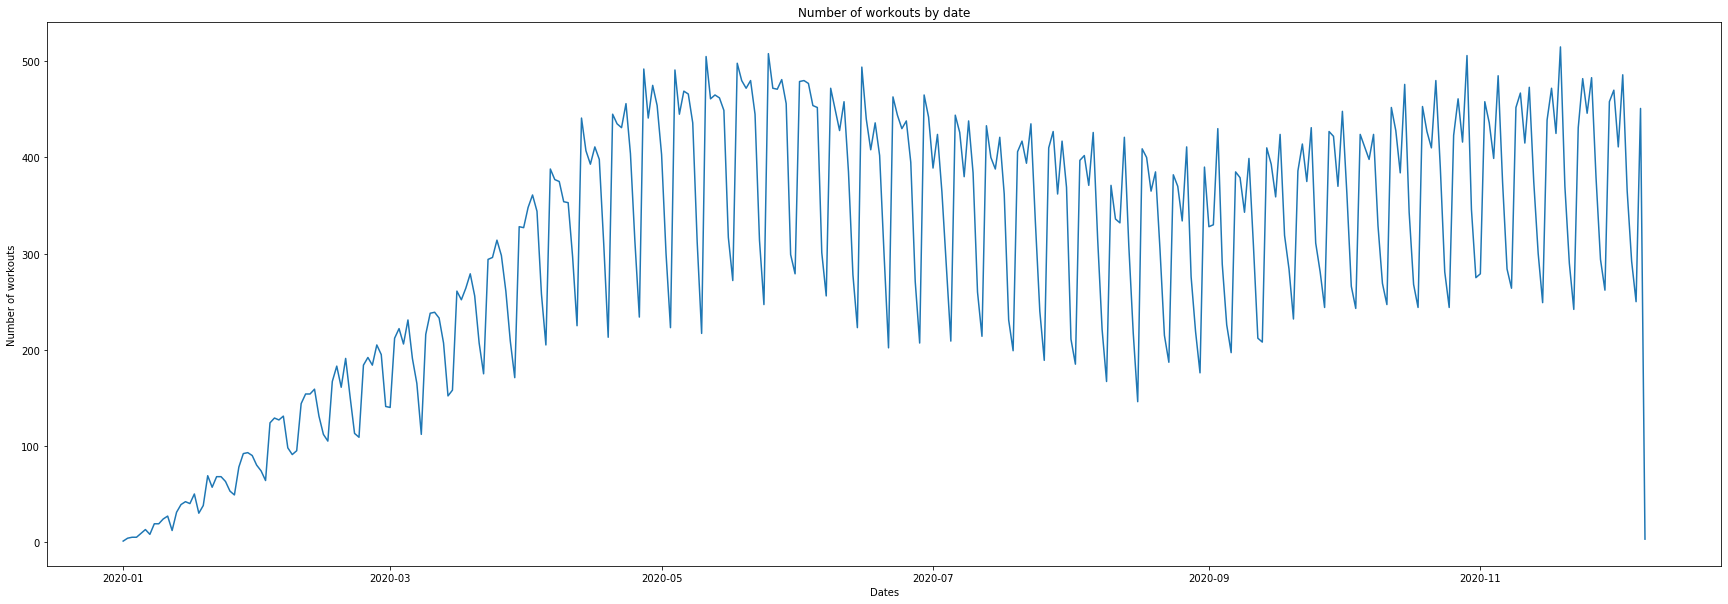

In [81]:
# построим график
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(trainings_by_day['date'], trainings_by_day['workout_id'])
plt.title('Number of workouts by date')
plt.xlabel('Dates')
plt.ylabel('Number of workouts')
plt.show()

In [17]:
print(len(workouts.index))

# удалим неполные данные
workouts_users.dropna(axis = 0, how = 'any', inplace = True)

# проверим, сколько строчек осталось
print(len(workouts_users.index))

104693
28684


## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом,  в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. 

**Построй гистограмму, которая покажет, как были распределены тренировки за ноябрь по тренерам, которые уже работали в нашей компании до 1 ноября и сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
        
 

*Весь код можно написать в одной ячейке.*

**Подготовим данные**


In [18]:
#выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

#множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [19]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [142]:
#кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем серию в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

# максимальное количество тренировок у одного тренера
np.max(workouts_by_trainer['workouts'])

33

In [22]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

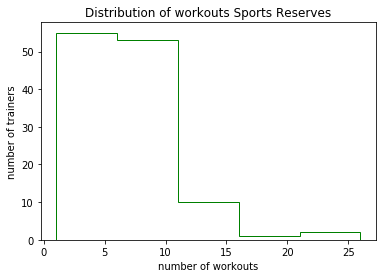

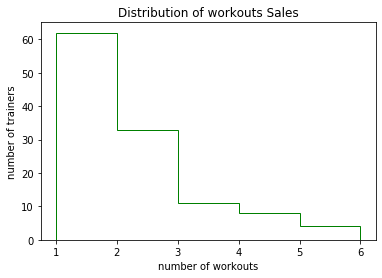

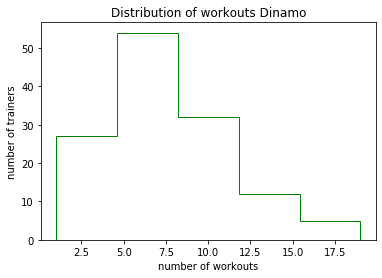

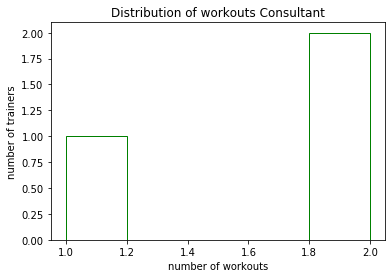

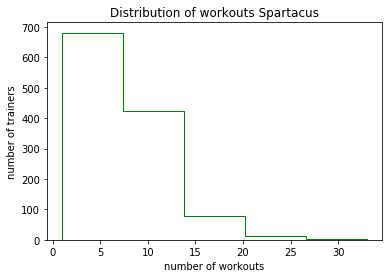

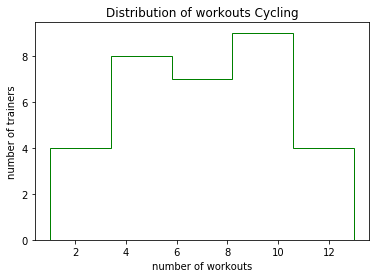

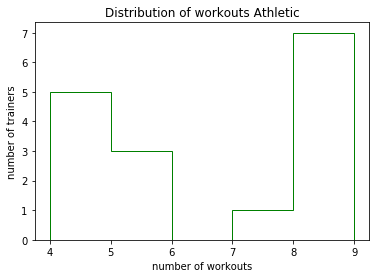

In [143]:
for i in departments:
    dat = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == i] 
    fig, ax = plt.subplots()
    ax.hist(dat['workouts'], label = 'number of workouts', bins=5, histtype = 'step', color = 'green')
    ax.set_xlabel('number of workouts')
    ax.set_ylabel('number of trainers')
    plt.title('Distribution of workouts ' + i)
    plt.show()

<span style="color:blue"> Самый загруженный департамент это Spartacus. У отдельных тренеров в ноябре было по 30 тренировок </span>

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренеровок по сравнению с остальными, и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В аргументы функции, которая строит boxplot, передай: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй свой цвет в графике
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график

In [25]:
# create a list with separate element for each department
data = []
for i in departments:
    dat =  workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == i].workouts
    data.append(dat)

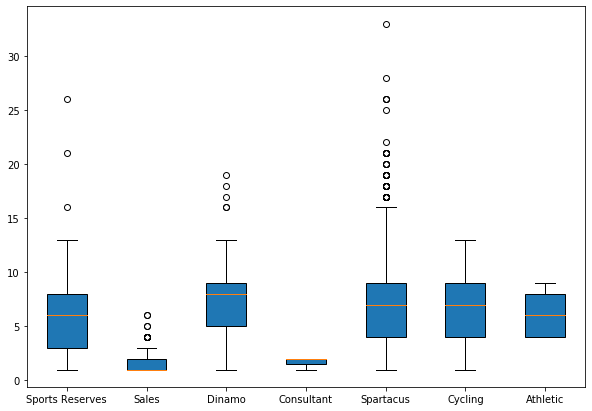

In [32]:
fig, ax = plt.subplots(figsize =(10, 7)) 
  
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True) 

# change labels
plt.xticks([1, 2, 3, 4, 5, 6, 7], departments)

plt.show()


<span style="color:blue"> В департаментах Spartakus и Sport Reserves есть аутлаеры - тренеры, которые проводят больше 15 тренировок.
И есть низкозагруженные департаменты - Consultant, Sales. Нужно перераспределить нагрузку между тренерами внутри департаментов
и между департаментами. </span>

## Задание 4


Логично, что дешевые тренировки пропускаю чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании, оставь комментарий по каждому графику, видишь ли ты какие-то явные зависимости в даннных.**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [34]:
# отфильтровали бесплатные тренировки и сделали копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# Изменяем тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# Кодируем столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаём агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.333333
3,500,8,0.357143
4,500,9,0.250000
5,500,10,0.411765
6,500,11,0.310345
7,500,12,0.151515
8,500,13,0.470588
9,500,14,0.281250


In [35]:
# создаём агрегированные наборы данных
cost_data_agg = cost_age_data.groupby(['cost'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 
cost_data_agg.head()

,cost,status
0,500,0.251351
1,750,0.209238
2,1000,0.156341
3,1500,0.120425


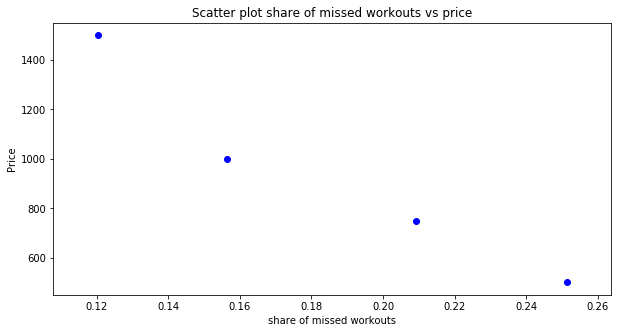

In [36]:
# строим скаттер плот
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(cost_data_agg['status'], cost_data_agg['cost'], color = 'blue')
plt.title("Scatter plot share of missed workouts vs price")
plt.xlabel('share of missed workouts')
plt.ylabel('Price')
plt.show()

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

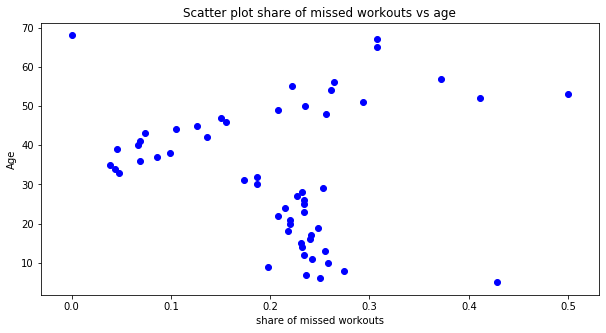

In [37]:
# создаём агрегированные наборы данных
age_data_agg = cost_age_data.groupby(['age'])['status'].mean().reset_index() #считаем долю прогулов по возрасту и цене 

# строим график

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(age_data_agg['status'], age_data_agg['age'], color = 'blue')
plt.title("Scatter plot share of missed workouts vs age")
plt.xlabel('share of missed workouts')
plt.ylabel('Age')
plt.show()

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту и к цене одновременно**
    - создай словарь цветов цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  с - цвета для разных цен
          

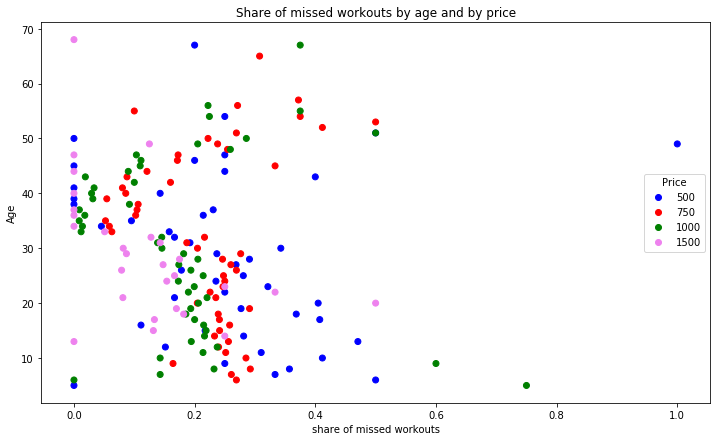

In [38]:
fig, ax = plt.subplots(figsize=(12, 7))

prices = [500, 750, 1000, 1500]
colors = ['blue', 'red', 'green', 'violet']

price_color = dict(zip(prices, colors))

scatter = ax.scatter(cost_age_data_agg['status'], cost_age_data_agg['age'],
                     c=cost_age_data_agg['cost'].apply(lambda x: price_color[x]))
# add legend
handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in colors]
plt.legend(handlelist,prices,loc='right', title = 'Price')

plt.title('Share of missed workouts by age and by price')
plt.xlabel('share of missed workouts')
plt.ylabel('Age')
plt.show()

## Задание 5

**Сделай heatmаp для кейса из задания 5.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй хитмап. Используй любые аргументы, но обязательно вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике.

In [42]:
# пишем функцию, которая поможет разбить клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [43]:
#кладем в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаём агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg

,cost,age_bin,status
0,500,0-20,0.298030
1,500,21-25,0.252336
2,500,26-30,0.253731
3,500,31-35,0.144928
4,500,36-40,0.159091
5,500,41-45,0.176471
6,500,46-50,0.250000
7,500,50+,0.272727
8,750,0-20,0.247801
9,750,21-25,0.242816


In [45]:
# создаем пивот-таблицу
cost_age_data_pivot=cost_age_data_agg.pivot(index='age_bin', columns='cost', values='status')
cost_age_data_pivot

cost,500,750,1000,1500
age_bin,,,,
0-20,0.298030,0.247801,0.205065,0.164179
21-25,0.252336,0.242816,0.198473,0.150000
26-30,0.253731,0.252906,0.183863,0.121849
31-35,0.144928,0.117008,0.062173,0.097826
36-40,0.159091,0.095169,0.029499,0.000000
41-45,0.176471,0.114865,0.079365,0.000000
46-50,0.250000,0.195965,0.173077,0.081081
50+,0.272727,0.315574,0.269231,0.000000


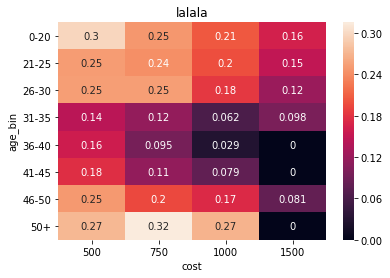

In [50]:
# создаем heatmap
ax = sns.heatmap(cost_age_data_pivot,  annot=True)
ax.set_title('Heatmap of missed workouts by cost and age bins')
plt.show()

<span style="color:blue"> Меньше всего пропускают возрастные группы 36-45 и 50+ с дорогими абонементами.
Больше всего 0-20 и 50+ с дешевыми абонементами. Средняя возрастная категория пропускает реже, чем молодежь и 
пожилые во всех ценовых категориях </span>

## EXTRA

Если остались силы, есть дополнительное задание, делать его можно по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти ее самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалаи:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки week_day_num по workouts с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию со средним количеством тренировок в день.
5. Оставь комментарий, что ты видишь на графике. 

**Подготовим данные**

In [130]:
trainings_by_day # посмотрим, в каком формате лежат нужные данные

,date,workout_id
0,2020-01-01,1
1,2020-01-02,4
2,2020-01-03,5
3,2020-01-04,5
4,2020-01-05,9
5,2020-01-06,13
6,2020-01-07,8
7,2020-01-08,19
8,2020-01-09,19
9,2020-01-10,24


In [131]:
trainings_by_day_frame = trainings_by_day # сбросим индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименуем столбцы, чтобы названия соответствовали содержимому

trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавим номер дня недели
trainings_by_day_frame.head()#trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавим название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num
0,2020-01-01,1,2
1,2020-01-02,4,3
2,2020-01-03,5,4
3,2020-01-04,5,5
4,2020-01-05,9,6
5,2020-01-06,13,0
6,2020-01-07,8,1
7,2020-01-08,19,2
8,2020-01-09,19,3
9,2020-01-10,24,4


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [132]:
trainings_by_day_frame['week_day_num'] += 1

In [137]:
# подсчитаем среднее количество тренировок
trainings_by_day_sum = trainings_by_day_frame.groupby('week_day_num').mean()

# вернем столбец с днем недели
trainings_by_day_sum.reset_index(inplace=True)

1

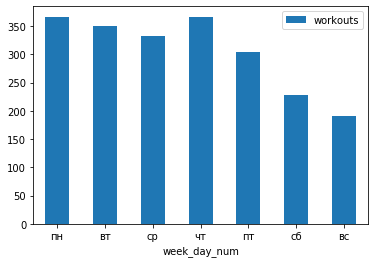

In [141]:

ax = trainings_by_day_sum.plot.bar(x='week_day_num', y='workouts', rot = 0)
# change labels
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['пн', 'вт', 'ср', 'чт', 'пт','сб','вс'])
plt.show()


# 🎉🎉🎉 Поздравляем, ты великолепен! 